<a href="https://colab.research.google.com/github/tchintchie/HR_Analysis/blob/master/HR_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HR Analysis

The HR department has tasked you with building a prediction model.
You are supposed to figure out if an employee is going to leave or no.

Below are two files, one for training and the other for testing.
The data is nicely formatted, with no missing values, no outliers... can be used as-is but you can wrangle it if you like.

We are predicting the 'left' column, 1 meaning yes and 0 meaning no.

The purpose of this exercise is to get you comfortable with using different models, reading the documentation, trying stuff out...

Here are the steps:
1. Load the HR_train data and do EDA as you see fit. I am not giving instructions as you should explore and decide what to do by yourself.
2. Split data into training/testing sets: https://pastebin.com/1pJkrTCV
3. Build your model with the train data: https://pastebin.com/4JqpvWxV
4. With your model built you need to import the testing data (HR_test) and try your model on it: https://pastebin.com/kpP3vTGf
5. Once done and happy with your score you need to summarize your findings: the HR department would like to know which groups are the most risky and if you see any trends or have suggestions for them on how to improve retention. (for that you will need to do EDA, dataviz... but as mentioned at the beginning, that's up to you).

And that's it. 
Try to raise the score by experimenting with column selection, filtering, model tweaking and the introduction of new models.
e.g. if you want to try a decision tree you just do: https://pastebin.com/ffVM0Sit

There are many more models if you want to play around: https://scikit-learn.org/stable/supervised_learning.html
They all follow the same logic of:
1. Import
2. Create an instance of it
3. Train
4. Score

# importing the libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm 
from sklearn import preprocessing
from sklearn import utils
import seaborn as sns
%matplotlib inline

# exploring the Dataset and converting datatypes where it makes sense

In [2]:
df = pd.read_csv("HR_train.csv")
df1 = pd.read_csv("HR_test.csv")
df = pd.concat([df, df1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
df.head()

,Department,Work_accident,average_montly_hours,department,last_evaluation,left,number_project,promotion_last_5years,salary,satisfaction_level,time_spend_company,work_accident
0,sales,0.0,157,NaN,0.53,1,2,0,low,0.38,3,NaN
1,sales,0.0,262,NaN,0.86,1,5,0,medium,0.80,6,NaN
2,sales,0.0,272,NaN,0.88,1,7,0,medium,0.11,4,NaN
3,sales,0.0,223,NaN,0.87,1,5,0,low,0.72,5,NaN
4,sales,0.0,159,NaN,0.52,1,2,0,low,0.37,3,NaN


In [4]:
df.shape

(14999, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 499
Data columns (total 12 columns):
Department               14499 non-null object
Work_accident            14499 non-null float64
average_montly_hours     14999 non-null int64
department               500 non-null object
last_evaluation          14999 non-null float64
left                     14999 non-null int64
number_project           14999 non-null int64
promotion_last_5years    14999 non-null int64
salary                   14999 non-null object
satisfaction_level       14999 non-null float64
time_spend_company       14999 non-null int64
work_accident            500 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.5+ MB


## drop the duplicate and incomplete `department` column

In [0]:
df.drop("department", axis=1, inplace=True)

## convert `salary` column to numerical 0, 1, 2

In [7]:
# low 7316 --> 0
# medium 6446 --> 1
# high 1237 --> 2

df["salary"]=df.salary.map({"low":0,"medium":1, "high":2})
df.salary.value_counts()

0    7316
1    6446
2    1237
Name: salary, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 499
Data columns (total 11 columns):
Department               14499 non-null object
Work_accident            14499 non-null float64
average_montly_hours     14999 non-null int64
last_evaluation          14999 non-null float64
left                     14999 non-null int64
number_project           14999 non-null int64
promotion_last_5years    14999 non-null int64
salary                   14999 non-null int64
satisfaction_level       14999 non-null float64
time_spend_company       14999 non-null int64
work_accident            500 non-null float64
dtypes: float64(4), int64(6), object(1)
memory usage: 1.4+ MB


### convert Department to numerical

In [9]:
# sales          4000 --> 0
# technical      2628 --> 1
# support        2156 --> 2
# IT             1190 --> 3
# product_mng     876 --> 4
# marketing       830 --> 5
# RandD           752 --> 6
# accounting      739 --> 7
# hr              711 --> 8
# management      617 --> 9
df["Department"] = df.Department.map({"sales":0, "technical":1,"support":2,"IT":3,"product_mng":4,"marketing":5,"RandD":6,"accounting":7,"hr":8,"management":9})
df.Department.value_counts()

0.0    4000
1.0    2628
2.0    2156
3.0    1190
4.0     876
5.0     830
6.0     752
7.0     739
8.0     711
9.0     617
Name: Department, dtype: int64

In [10]:
df.Work_accident.value_counts()

0.0    12383
1.0     2116
Name: Work_accident, dtype: int64

In [0]:
df.drop("work_accident", inplace=True, axis=1)

# clean up remaining null values
## replace them with `0`

In [12]:
df.isnull().sum()

Department               500
Work_accident            500
average_montly_hours       0
last_evaluation            0
left                       0
number_project             0
promotion_last_5years      0
salary                     0
satisfaction_level         0
time_spend_company         0
dtype: int64

In [0]:
df.Department.fillna(0, inplace=True)
df.Work_accident.fillna(0, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 499
Data columns (total 10 columns):
Department               14999 non-null float64
Work_accident            14999 non-null float64
average_montly_hours     14999 non-null int64
last_evaluation          14999 non-null float64
left                     14999 non-null int64
number_project           14999 non-null int64
promotion_last_5years    14999 non-null int64
salary                   14999 non-null int64
satisfaction_level       14999 non-null float64
time_spend_company       14999 non-null int64
dtypes: float64(4), int64(6)
memory usage: 1.3 MB


## Check for correlations between variables

In [15]:
corr = df.corr()
corr

,Department,Work_accident,average_montly_hours,last_evaluation,left,number_project,promotion_last_5years,salary,satisfaction_level,time_spend_company
Department,1.000000,0.017630,-0.008907,0.004335,-0.049121,-0.008812,0.077508,0.099264,0.002154,0.042822
Work_accident,0.017630,1.000000,-0.007937,-0.007073,-0.157295,-0.001595,0.041148,0.011603,0.059013,0.004032
average_montly_hours,-0.008907,-0.007937,1.000000,0.339742,0.071287,0.417211,-0.003544,-0.002242,-0.020048,0.127755
last_evaluation,0.004335,-0.007073,0.339742,1.000000,0.006567,0.349333,-0.008684,-0.013002,0.105021,0.131591
left,-0.049121,-0.157295,0.071287,0.006567,1.000000,0.023787,-0.061788,-0.157898,-0.388375,0.144822
number_project,-0.008812,-0.001595,0.417211,0.349333,0.023787,1.000000,-0.006064,-0.001803,-0.142970,0.196786
promotion_last_5years,0.077508,0.041148,-0.003544,-0.008684,-0.061788,-0.006064,1.000000,0.098119,0.025605,0.067433
salary,0.099264,0.011603,-0.002242,-0.013002,-0.157898,-0.001803,0.098119,1.000000,0.050022,0.048715
satisfaction_level,0.002154,0.059013,-0.020048,0.105021,-0.388375,-0.142970,0.025605,0.050022,1.000000,-0.100866
time_spend_company,0.042822,0.004032,0.127755,0.131591,0.144822,0.196786,0.067433,0.048715,-0.100866,1.000000


### create heatmap for better visibility

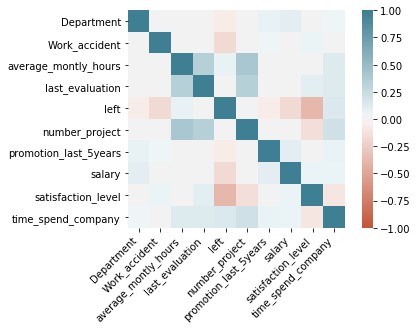

In [16]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

#### we can see some correlation between `satisfaction_level` and `left` (negative)

# start preparing for prediction model
## splitting the dataset

In [0]:
cols_to_use = ["Department","Work_accident","average_montly_hours","last_evaluation","number_project","promotion_last_5years","salary","satisfaction_level","time_spend_company"]
X = df[cols_to_use] # Here you enter whichever columns you think have an impact on the score. Experiment with it
y = df['left'] # Here you enter 'left' as this is what we are predicting
 
# Create test/train sets of data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85) # Play around with train_size and other params

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12749, 9)
(2250, 9)
(12749,)
(2250,)


In [19]:
# Create an instance
logreg = LogisticRegression(max_iter=1000)
# Train it
logreg.fit(X_train, y_train)
# Test how well it performs on the training data
print("Score: ",logreg.score(X_test, y_test))

Score:  0.8048888888888889


# testing the model with linear Regression
## importing the test data

In [20]:
df_test = pd.read_csv('HR_test.csv')
# low 7316 --> 0
# medium 6446 --> 1
# high 1237 --> 2
df_test["salary"]=df_test.salary.map({"low":0,"medium":1, "high":2})
df_test.salary.value_counts()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
satisfaction_level       500 non-null float64
last_evaluation          500 non-null float64
number_project           500 non-null int64
average_montly_hours     500 non-null int64
time_spend_company       500 non-null int64
work_accident            500 non-null int64
left                     500 non-null int64
promotion_last_5years    500 non-null int64
department               500 non-null object
salary                   500 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 39.2+ KB


In [21]:
# sales          4000 --> 0
# technical      2628 --> 1
# support        2156 --> 2
# IT             1190 --> 3
# product_mng     876 --> 4
# marketing       830 --> 5
# RandD           752 --> 6
# accounting      739 --> 7
# hr              711 --> 8
# management      617 --> 9
df_test["Department"] = df_test.department.map({"sales":0, "technical":1,"support":2,"IT":3,"product_mng":4,"marketing":5,"RandD":6,"accounting":7,"hr":8,"management":9})
df_test.Department.value_counts()

0    140
1     92
2     73
3     37
6     35
8     28
7     28
5     28
4     26
9     13
Name: Department, dtype: int64

In [0]:
df_test["Work_accident"] = df_test.work_accident

In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
satisfaction_level       500 non-null float64
last_evaluation          500 non-null float64
number_project           500 non-null int64
average_montly_hours     500 non-null int64
time_spend_company       500 non-null int64
work_accident            500 non-null int64
left                     500 non-null int64
promotion_last_5years    500 non-null int64
department               500 non-null object
salary                   500 non-null int64
Department               500 non-null int64
Work_accident            500 non-null int64
dtypes: float64(2), int64(9), object(1)
memory usage: 47.0+ KB


In [24]:
X1 = df_test[cols_to_use] # Must be the same columns as the training data otherwise it wont work. If you want to experiment with different columns always change the training ones first and then those here.
y1 = df_test['left']
 
# Scoring
print("Score: ",logreg.score(X1, y1)) # Make sure you use the testing data, not training (X_test, y_test)
y_pred = logreg.predict(X_test)
print("Logistic Regression Prediction: ",y_pred)

Score:  0.65
Logistic Regression Prediction:  [1 0 0 ... 0 0 0]


# Desicion Tree

In [25]:
 tree = DecisionTreeClassifier() # Make sure you don't use the same name as before
#Training
tree.fit(X_train, y_train) # Use traning data, not testing
# Score
print("Score: ",tree.score(X1, y1)) # Score on the testing data
y_pred_tree = tree.predict(X_test)
print("Desicion Tree Prediction: ", y_pred_tree)

Score:  0.984
Desicion Tree Prediction:  [0 0 0 ... 1 0 0]


# Visualize relationship between features and target using scatterplot

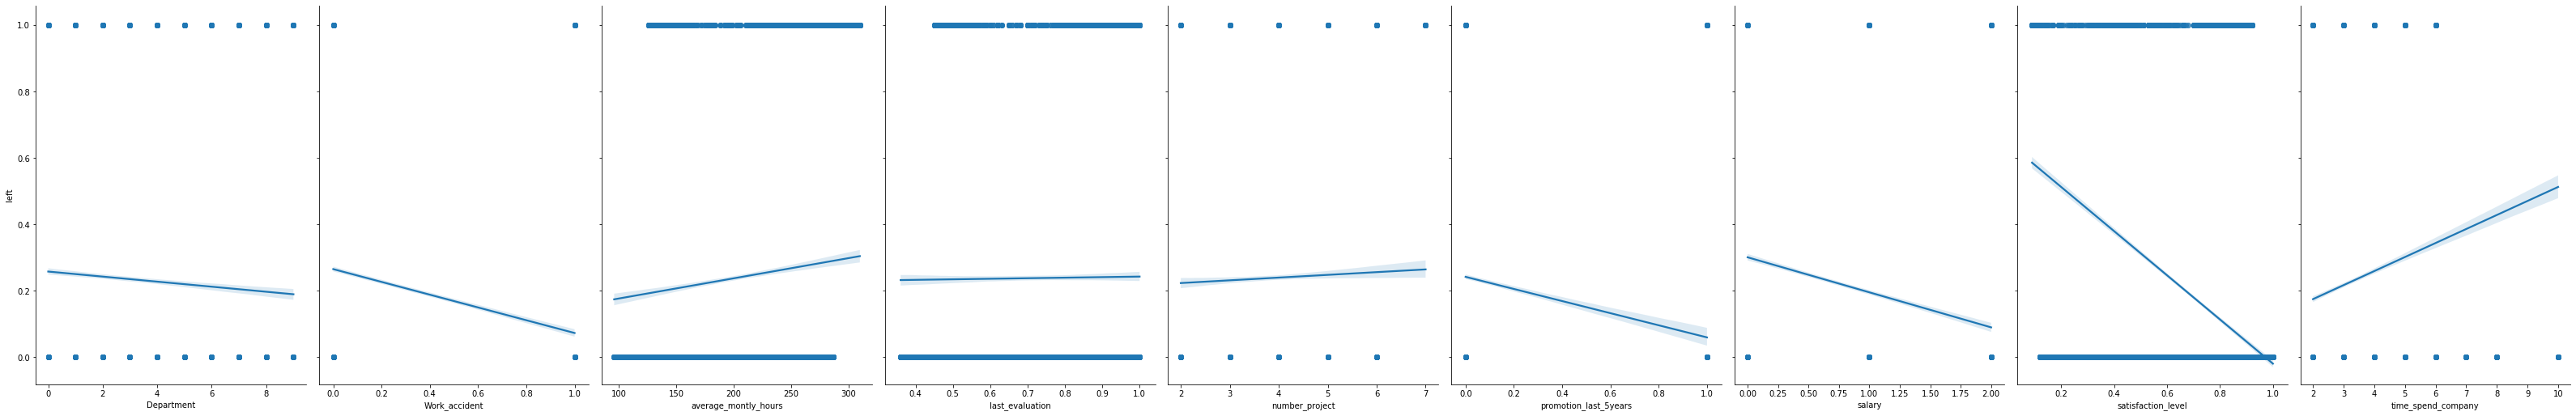

In [26]:
sns.pairplot(df, x_vars=cols_to_use, y_vars="left",height=7, aspect=0.7, kind="reg")
plt.show()

In [27]:
lin_weights = list(zip(cols_to_use, logreg.coef_))
lin_weights = pd.DataFrame(lin_weights)
lin_weights.columns = ['Feature', 'Weight']
lin_weights.set_index('Feature', inplace=True)
lin_weights.sort_values(by='Weight', inplace=True)
lin_weights

,Weight
Feature,
Department,"[-0.03459414858054237, -1.5854902371478568, 0...."


# comparing different models

In [0]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [34]:
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=1000,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('LDA',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                             solver='svd', store_covariance=False, tol=0.0001)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('CART',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_

In [102]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
	cv_results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.796000 (0.020983)
LDA: 0.783556 (0.027038)
KNN: 0.900444 (0.022853)
CART: 0.966667 (0.012131)
NB: 0.716444 (0.117468)
SVM: 0.768889 (0.022922)


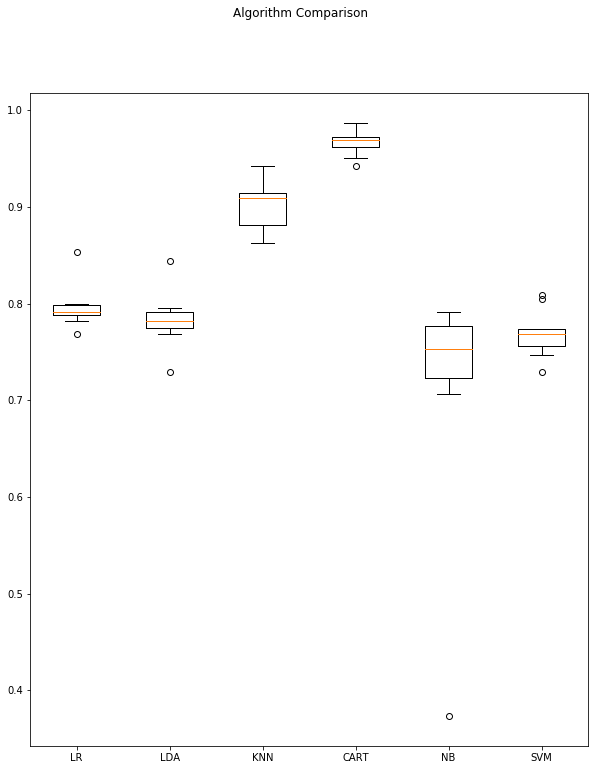

In [103]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(10,12))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# comparing models with a different fuction

In [104]:
lab_enc = preprocessing.LabelEncoder()
y_encoded = lab_enc.fit_transform(y_train)

def find_best_model(X,y):
  algos = {'linear_regression' : {'model': LinearRegression(),'params': {'normalize': [True, False]}},'lasso': {'model': Lasso(),'params': {'alpha': [1,2],'selection': ['random', 'cyclic']}},'decision_tree': {'model': DecisionTreeRegressor(),'params': {'criterion' : ['mse','friedman_mse'],'splitter': ['best','random']}},'svm' : {'model': svm.SVC(),'params': {'kernel': ['poly', 'rbf']}}  }
  scores = []
  
  for algo_name, config in algos.items():
    gs =  GridSearchCV(config['model'], config['params'], return_train_score=False)
    gs.fit(X,y_encoded)
    scores.append({'model': algo_name,'best_score': gs.best_score_,'best_params': gs.best_params_})   
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


find_best_model(X_train,y_train)

,model,best_score,best_params
0,linear_regression,0.210262,{'normalize': False}
